# Plot mixed layer depth in ACCESS-CM2-025 and compare 

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client

import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm
import numpy as np
%matplotlib inline

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/46707/status,
Dashboard: /proxy/46707/status,Workers: 7
Total threads: 14,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33417,Workers: 7
Dashboard: /proxy/46707/status,Total threads: 14
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://127.0.0.1:34457,Total threads: 2
Dashboard: /proxy/36781/status,Memory: 9.14 GiB
Nanny: tcp://127.0.0.1:40323,


In [3]:
# CM2 database
session_CM2 = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/CM2.db')
expt_CM2_025 = 'cj877'
expt_CM2_1   = 'bz687'

In [3]:
# OM2 database
session_OM2  = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
expt_OM2_025 = '025deg_jra55_ryf9091_gadi'
expt_OM2_1   = '1deg_jra55_ryf9091_gadi'

In [15]:
test = cc.querying.getvar(expt_OM2_01, 'ht', session, n=1)

2022-09-13 19:03:30,656 - distributed.worker - WARNING - Compute Failed
Key:       open_dataset-19345439-51c1-43f9-a6c7-bb36ba9694e2
Function:  execute_task
args:      ((<function apply at 0x14bda00d1310>, <function open_dataset at 0x14bd1d35a8b0>, ['/g/data/cj50/access-om2/raw-output/access-om2-01/01deg_jra55v140_iaf_cycle4/output777/ocean/ocean-2d-ht.nc'], (<class 'dict'>, [['engine', None], ['chunks', (<class 'dict'>, [['yt_ocean', 540], ['xt_ocean', 720]])]])))
kwargs:    {}
Exception: "FileNotFoundError(2, 'No such file or directory')"



FileNotFoundError: [Errno 2] No such file or directory: b'/g/data/cj50/access-om2/raw-output/access-om2-01/01deg_jra55v140_iaf_cycle4/output777/ocean/ocean-2d-ht.nc'

In [14]:
expt_OM2_01 = '01deg_jra55v140_iaf_cycle4'#'01deg_jra55_ryf9091_gadi'
session = cc.database.create_session('/g/data/ik11/databases/daily/cosima_master_2022-08-30.db')

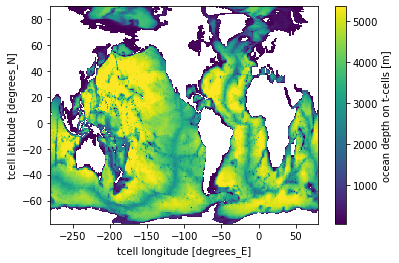

In [7]:
test.plot()

In [16]:
session = cc.database.create_session('/g/data/ik11/databases/daily/cosima_master_2022-08-30.db')
ht = cc.querying.getvar('01deg_jra55v13_ryf9091','ht' , session,n=1)

In [5]:
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'

If you get a 'read-only database' warning, it is because the database has not finished building. 

In [6]:
# Plotting info
ft_size = 16
plt.rcParams.update({'font.size': ft_size})

### Mixed layer depth

In [10]:
mld = cc.querying.getvar(control, 'mld', session_CM2, start_time=start_time, end_time='0001-12-31', frequency='1 monthly')
mld = mld.sel(time=slice(start_time,'0001-12-31')).resample(time='Y').mean()
mld 

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array

<xarray.DataArray 'mld' (time: 1, yt_ocean: 1080, xt_ocean: 1440)>
dask.array<stack, shape=(1, 1080, 1440), dtype=float32, chunksize=(1, 540, 720), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0001-12-31 00:00:00
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yt_ocean  (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.74 89.84 89.95

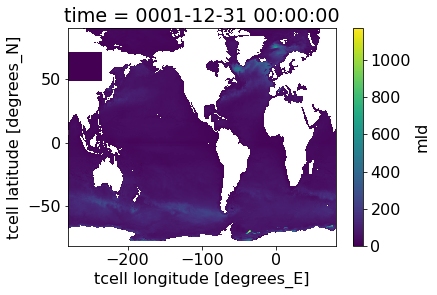

In [11]:
mld.plot()

**Weddell Sea**

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, cal

CPU times: user 24.1 s, sys: 3.97 s, total: 28 s
Wall time: 1min 5s


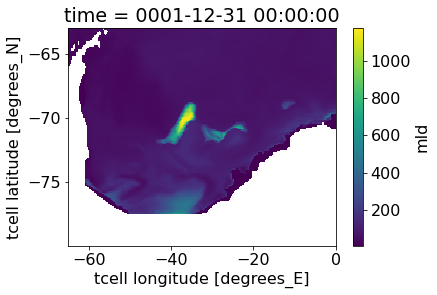

In [8]:
%%time
mld = cc.querying.getvar(control, 'mld', session_CM2, start_time=start_time, end_time=end_time, frequency='1 monthly')
mld_WS = mld.sel(xt_ocean=slice(-65,0)).sel(yt_ocean=slice(-80,-63)).sel(time=slice(start_time,end_time)).resample(time='Y').mean()

mld_WS[0,:,:].plot()

In [13]:
%%time
mld = cc.querying.getvar(expt_CM2_025, 'mld', session_CM2, start_time='0001-01-01', end_time='0499-12-31', frequency='1 monthly')
mld_WS = mld.sel(xt_ocean=slice(-65,0)).sel(yt_ocean=slice(-80,-63)).sel(time=slice('0001-01-01','0499-12-31')).resample(time='Y').mean()

CPU times: user 15.1 s, sys: 1.4 s, total: 16.5 s
Wall time: 26 s


In [18]:
mld_WS_max = mld_WS.max(dim='xt_ocean').max(dim='yt_ocean').compute()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice 

In [20]:
mld_WS_max.to_netcdf(path_to_data + 'mld_WS_max_annual.nc')

**North Atlantic**

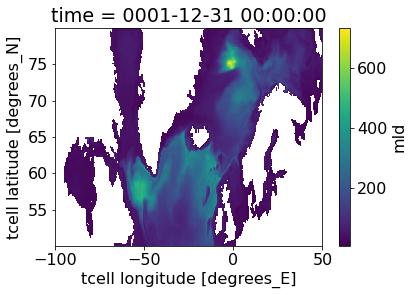

In [15]:
mld_NA = mld.sel(xt_ocean=slice(-100, 50)).sel(yt_ocean=slice(50,80))

mld_NA.plot()

In [15]:
%%time
mld = cc.querying.getvar(expt_CM2_025, 'mld', session_CM2, start_time='0001-01-01', end_time='0499-01-01', frequency='1 monthly')
mld_NA = mld.sel(xt_ocean=slice(-100, 50)).sel(yt_ocean=slice(50,80)).sel(time=slice('0001-01-01','0499-01-01')).resample(time='Y').mean()

CPU times: user 14.8 s, sys: 814 ms, total: 15.6 s
Wall time: 16.9 s


In [21]:
mld_NA_max = mld_NA.max(dim='xt_ocean').max(dim='yt_ocean').compute()
mld_NA_max.to_netcdf(path_to_data + 'mld_NA_max_annual.nc')

In [7]:
# # Reload data
# mld_WS_max = xr.open_dataarray(path_to_data + 'mld_WS_max_annual.nc')
# mld_NA_max = xr.open_dataarray(path_to_data + 'mld_NA_max_annual.nc')

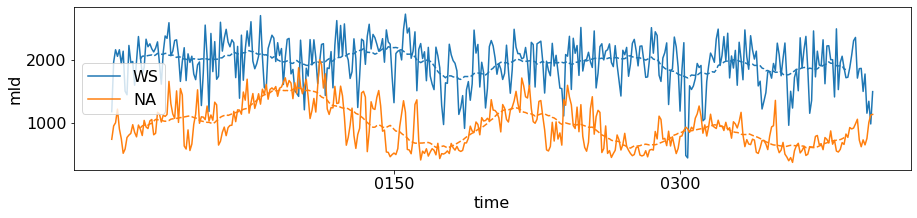

In [23]:
fig = plt.figure(figsize=(15,3))

mld_WS_max.plot(label='WS', color='C0')
mld_WS_max.rolling(time=30, center=True).mean('time').plot(color='C0', linestyle='--')
mld_NA_max.plot(label='NA', color='C1')
mld_NA_max.rolling(time=30, center=True).mean('time').plot(color='C1', linestyle='--')
plt.legend()

100 years


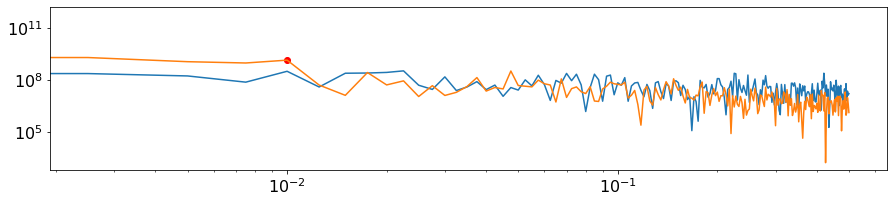

In [26]:
fig = plt.figure(figsize=(15,3))
freq, ps = get_spectrum(mld_WS_max)
plt.loglog(freq, ps[:])
freq, ps = get_spectrum(mld_NA_max)
plt.loglog(freq, ps[:])
plt.scatter(freq[4], ps[4], color='r')
print(int(np.round(1/freq[4])), 'years')

In [16]:
# MLD from CM2-1
mld = cc.querying.getvar(expt_CM2_1, 'mld', session_CM2, start_time='0001-01-01', end_time='0499-12-31', frequency='1 monthly')
mld_NA = mld.sel(xt_ocean=slice(-100, 50)).sel(yt_ocean=slice(50,80)).sel(time=slice('0001-01-01','0499-12-31')).resample(time='Y').mean()
mld_WS = mld.sel(xt_ocean=slice(-65,0)).sel(yt_ocean=slice(-80,-63)).sel(time=slice('0001-01-01','0499-12-31')).resample(time='Y').mean()

In [17]:
mld_NA_max = mld_NA.max(dim='xt_ocean').max(dim='yt_ocean').compute()
mld_NA_max.to_netcdf(path_to_data + '/Comparison_ACCESS_CM2_1/mld_NA_max_annual_CM2_1.nc')

mld_WS_max = mld_WS.max(dim='xt_ocean').max(dim='yt_ocean').compute()
mld_WS_max.to_netcdf(path_to_data + '/Comparison_ACCESS_CM2_1/mld_WS_max_annual_CM2_1.nc')

In [ ]:
# MLD from OM2-025
mld = cc.querying.getvar(expt_OM2_025, 'mld', session_OM2, start_time='1900-01-01', end_time='2400-12-31', frequency='1 monthly')
mld_NA = mld.sel(xt_ocean=slice(-100, 50)).sel(yt_ocean=slice(50,80)).sel(time=slice('1900-01-01','2400-12-31')).resample(time='Y').mean()
mld_WS = mld.sel(xt_ocean=slice(-65,0)).sel(yt_ocean=slice(-80,-63)).sel(time=slice('1900-01-01','2400-12-31')).resample(time='Y').mean()

In [ ]:
mld_NA_max = mld_NA.max(dim='xt_ocean').max(dim='yt_ocean').compute()
mld_NA_max.to_netcdf(path_to_data + '/Comparison_ACCESS_OM2_025/mld_NA_max_annual_OM2_025.nc')

mld_WS_max = mld_WS.max(dim='xt_ocean').max(dim='yt_ocean').compute()
mld_WS_max.to_netcdf(path_to_data + '/Comparison_ACCESS_OM2_025/mld_WS_max_annual_OM2_025.nc')

In [ ]:
# MLD from OM2-1
mld = cc.querying.getvar(expt_OM2_1, 'mld', session_OM2, start_time='1900-01-01', end_time='2400-12-31', frequency='1 monthly')
mld_NA = mld.sel(xt_ocean=slice(-100, 50)).sel(yt_ocean=slice(50,80)).sel(time=slice('1900-01-01','2400-12-31')).resample(time='Y').mean()
mld_WS = mld.sel(xt_ocean=slice(-65,0)).sel(yt_ocean=slice(-80,-63)).sel(time=slice('1900-01-01','2400-12-31')).resample(time='Y').mean()

In [ ]:
mld_NA_max = mld_NA.max(dim='xt_ocean').max(dim='yt_ocean').compute()
mld_NA_max.to_netcdf(path_to_data + '/Comparison_ACCESS_OM2_1/mld_NA_max_annual_OM2_1.nc')

mld_WS_max = mld_WS.max(dim='xt_ocean').max(dim='yt_ocean').compute()
mld_WS_max.to_netcdf(path_to_data + '/Comparison_ACCESS_OM2_1/mld_WS_max_annual_OM2_1.nc')

In [7]:
# Reload data
mld_WS_max_CM2_025 = xr.open_dataarray(path_to_data + '/mld_WS_max_annual.nc')
mld_NA_max_CM2_025 = xr.open_dataarray(path_to_data + '/mld_NA_max_annual.nc')

mld_WS_max_OM2_025 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_025/mld_WS_max_annual_OM2_025.nc')
mld_NA_max_OM2_025 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_025/mld_NA_max_annual_OM2_025.nc')

mld_WS_max_OM2_1 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_1/mld_WS_max_annual_OM2_1.nc')
mld_NA_max_OM2_1 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_OM2_1/mld_NA_max_annual_OM2_1.nc')

mld_WS_max_CM2_1 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_CM2_1/mld_WS_max_annual_CM2_1.nc')
mld_NA_max_CM2_1 = xr.open_dataarray(path_to_data + '/Comparison_ACCESS_CM2_1/mld_NA_max_annual_CM2_1.nc')

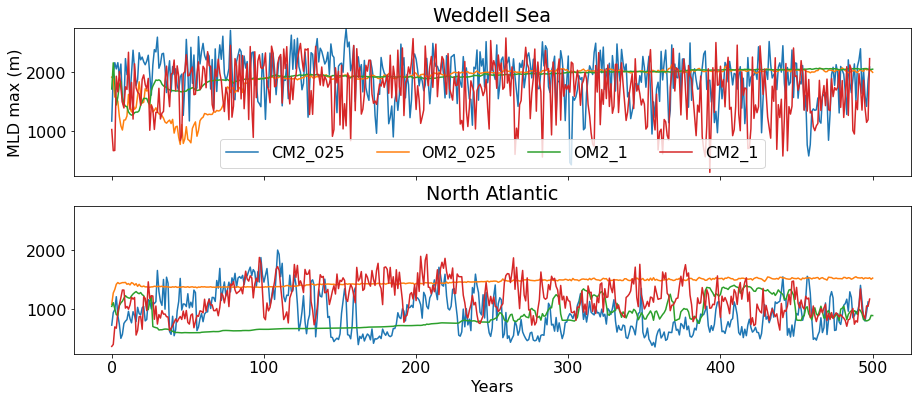

In [9]:
fig = plt.figure(figsize=(15,6))

plt.subplot(211)
plt.title('Weddell Sea')
plt.plot(mld_WS_max_CM2_025, color='C0', label='CM2_025')
plt.plot(mld_WS_max_OM2_025, color='C1', label='OM2_025')
plt.plot(mld_WS_max_OM2_1, color='C2', label='OM2_1')
plt.plot(mld_WS_max_CM2_1, color='C3', label='CM2_1')
plt.legend(ncol=4)
plt.ylabel('MLD max (m)')
plt.tick_params(labelbottom=False)
plt.ylim(250, 2750)

plt.subplot(212)
plt.plot(mld_NA_max_CM2_025, color='C0')
plt.plot(mld_NA_max_OM2_025, color='C1')
plt.plot(mld_NA_max_OM2_1, color='C2')
plt.plot(mld_NA_max_CM2_1, color='C3')
plt.title('North Atlantic')
plt.ylim(250, 2750)
plt.xlabel('Years');

In [ ]:
# SST by basin
# Overturning
# Surface maps (animation?)

In [33]:
%%time
mld = cc.querying.getvar(control, 'mld', session_CM2, start_time='0350-01-01', end_time='0359-12-31', frequency='1 monthly')
mld_WS = mld.sel(xt_ocean=slice(-65,0)).sel(yt_ocean=slice(-80,-63)).sel(time=slice('0350-01-01','0359-12-31'))#.resample(time='Y').mean()
mld_WS = mld_WS.load()

CPU times: user 1.6 s, sys: 541 ms, total: 2.14 s
Wall time: 4.8 s


In [34]:
mld_WS

<xarray.DataArray 'mld' (time: 120, yt_ocean: 160, xt_ocean: 260)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [ 19.762512,  16.639389,  13.620381, ...,  21.139362,
          21.353405,  21.496828],
        [ 21.260777,  19.275171,  16.30458 , ...,  20.444115,
          20.988   ,  21.337349],
        [ 22.807184,  21.623861,  20.025316, ...,  20.08453 ,
          20.381168,  20.83598 ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [ 27.781382,  24.262062,  22.07959 , ...,  86.60308 ,
          85.7081  ,  84.72896 ],
        [ 29.749947,  27.582739,  24.991589, ...,  86.08992 ,
          85.69476 ,  85.15873 ],
        [ 31.595417,  30.590742,  28.90251 , ...,  88.71897 ,
          88.265305,  87.23296 ]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [ 21.771751,  19.562979,  17.623075, ...,  27.510683,
          27.682343,  27.497166],
        [ 23.74091 ,  21.99471 ,  19.97078 , ...,  25.949211,
          26.666784,  26.776543],
        [ 24.950895,  24.085155,  22.740248, ...,  26.200518,
          26.778185,  27.17589 ]]], dtype=float32)
Coordinates:
  * xt_ocean  (xt_ocean) float64 -64.88 -64.62 -64.38 ... -0.625 -0.375 -0.125
  * yt_ocean  (yt_ocean) float64 -79.92 -79.81 -79.7 ... -63.28 -63.17 -63.06
  * time      (time) object 0350-01-16 12:00:00 ... 0359-12-16 12:00:00
Attributes:
    long_name:      mixed layer depth determined by density criteria
    units:          m
    valid_range:    [      0. 1000000.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  ocean_mixed_layer_thickness_defined_by_sigma_t
    time_bnds:      <xarray.DataArray 'time_bnds' (time: 126, nv: 2)>\ndask.a...
    ncfiles:        ['/g/data/p73/archive/non-CMIP/ACCESS-CM2/cj877/history/o...
    contact:        Martin Dix
    email:          martin.dix@csiro.au
    created:        2021-11-30
    description:    ACCESS-CM2 with n96 atmosphere coupled to COSIMA OM2 0.25...
    url:            https://code.metoffice.gov.uk/svn/roses-u/c/j/8/7/7/trunk

In [39]:
import xmovie
from xmovie import Movie

In [37]:
def custom_plotfunc(ds, fig, tt, *args, **kwargs):
    # Define station location for timeseries

    plt.title('Year %i'%ds.time.dt.year[tt].values)
    plt.pcolormesh(ds.xt_ocean, ds.yt_ocean, ds[tt,:,:], vmin=0, vmax=3000)
    cbar = plt.colorbar()
    cbar.set_label('MLD (m)')
    plt.xlabel('Longitude $^{\circ}$N')
    plt.ylabel('Latitude $^{\circ}$E')
    
    return None, None
    # ^ This is not strictly necessary, but otherwise a warning will be raised.

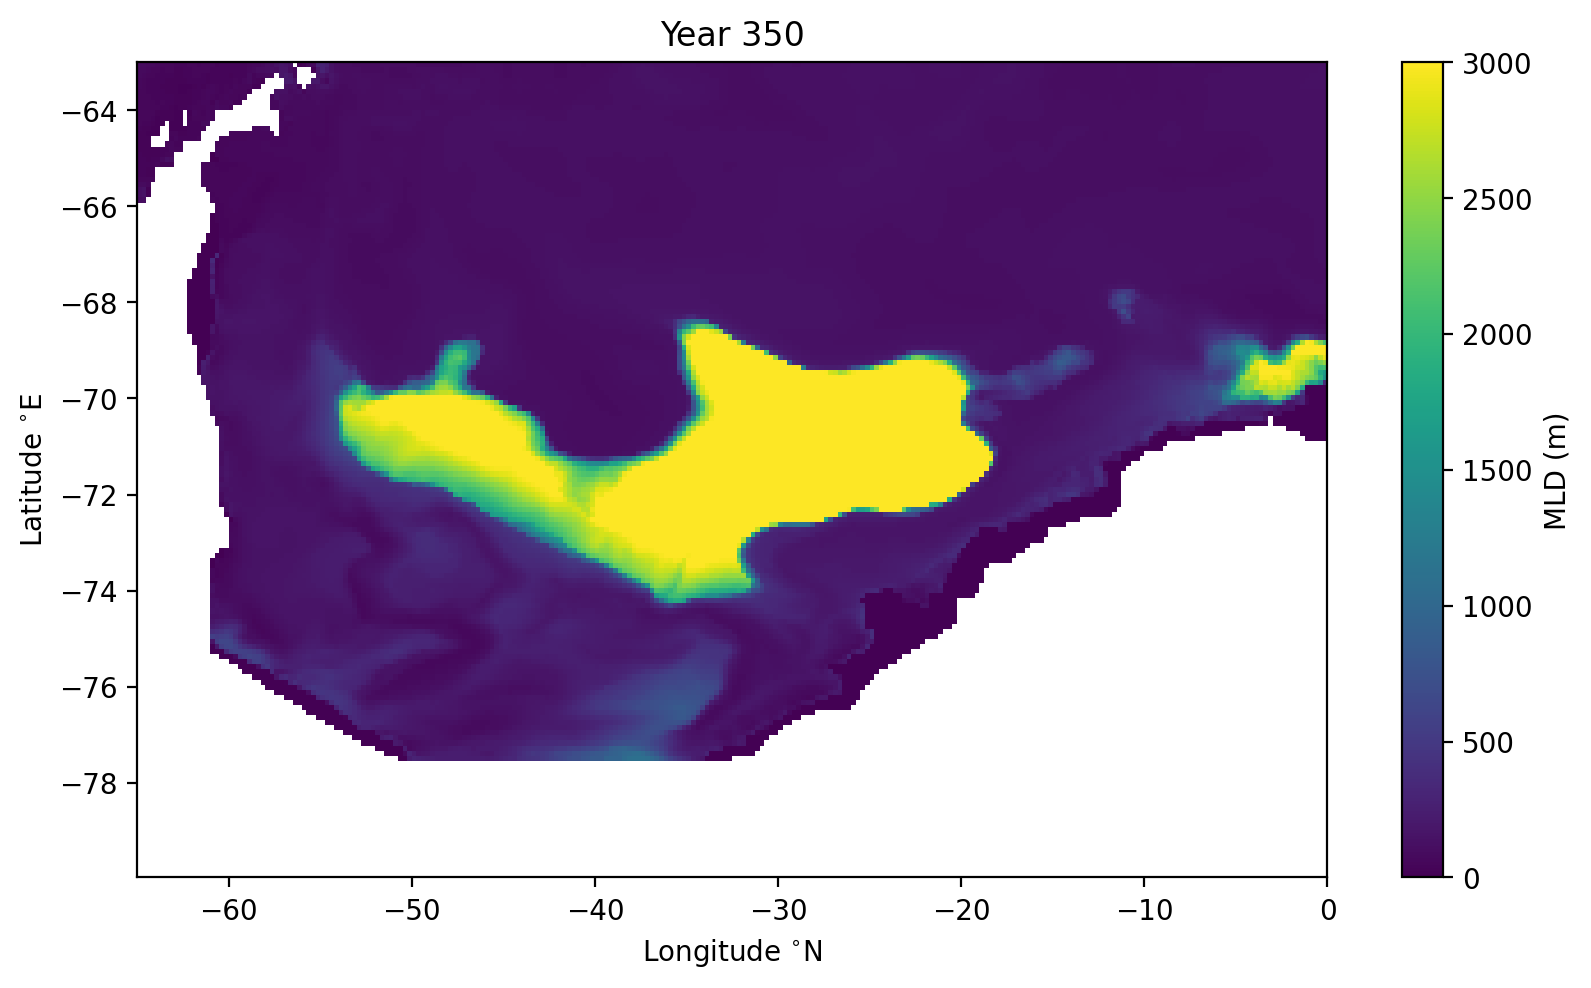

In [35]:
mov_custom = Movie(mld_WS, custom_plotfunc)
mov_custom.preview(8)

In [ ]:
# Save as mp4
mov_custom.save(path_to_data + '/movie_mld_WS_years_350_360.mp4', progress=True)  # *.gif

Repeat for OM2-025

In [36]:
%%time
mld = cc.querying.getvar(expt_OM2_025, 'mld', session_OM2, start_time='1990-01-01', end_time='1999-12-31', frequency='1 monthly')
mld_WS = mld.sel(xt_ocean=slice(-65,0)).sel(yt_ocean=slice(-80,-63)).sel(time=slice('1990-01-01','1999-12-31'))
mld_WS = mld_WS.load()

CPU times: user 1.11 s, sys: 269 ms, total: 1.38 s
Wall time: 6.33 s


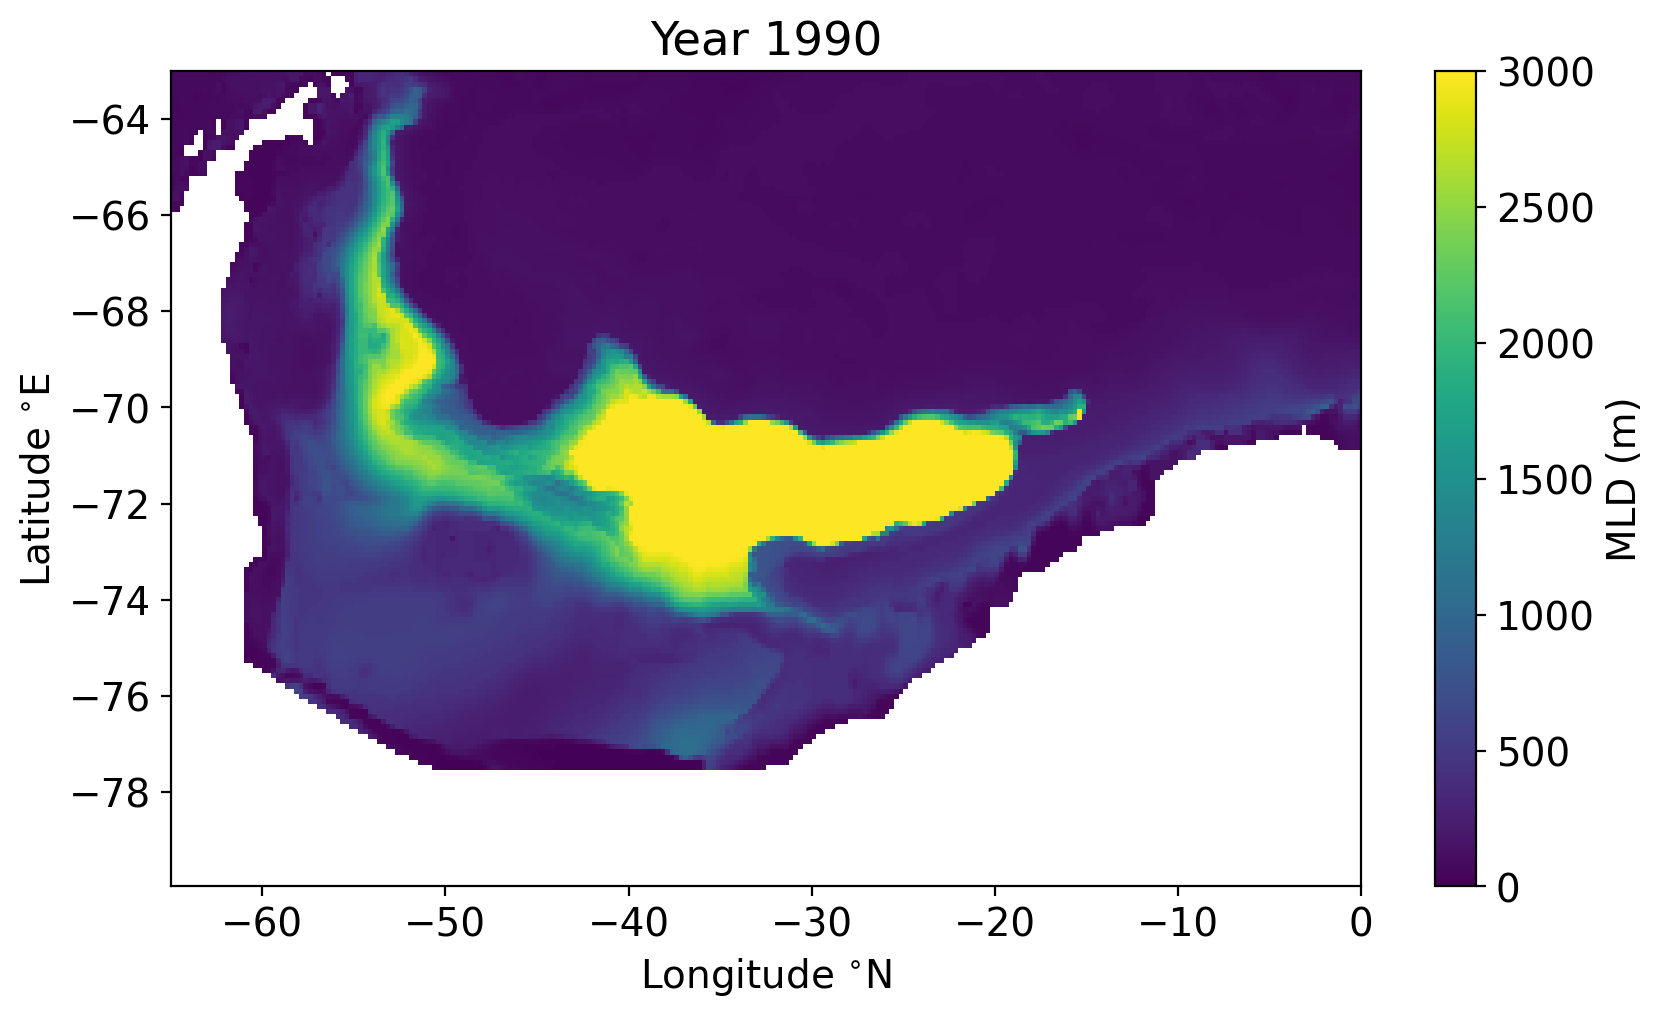

In [40]:
mov_custom = Movie(mld_WS, custom_plotfunc)
mov_custom.preview(8)

In [41]:
# Save as mp4
mov_custom.save(path_to_data + '/movie_mld_WS_OM2_025_years_1990_1999.mp4', progress=True)

  0%|          | 0/120 [00:00<?, ?it/s]

2022-06-29 21:22:30,071 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2022-06-29 21:22:30,747 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2022-06-29 21:22:31,385 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2022-06-29 21:22:32,083 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)
2022-06-29 21:22:32,799 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)
2022-06-29 21:22:33,409 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)
2022-06-29 21:22:34,099 - distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)
2022-06-29 21:22:34,850 - distributed.utils_perf - WARNING - full garbage collections took

Movie created at movie_mld_WS_OM2_025_years_1990_1999.mp4


### Time series of winter (Jul-Sep) deep convection area

In [ ]:
# Load area
area_t = cc.querying.getvar(control, 'area_t', session_CM2, n=1) 
area_t = area_t.sel(xt_ocean=slice(-65,0)).sel(yt_ocean=slice(-80,-63))

In [29]:
def get_mld_area(expt, session, start_year, end_year):

    # Load mld for Weddell Sea region
    mld = cc.querying.getvar(expt, 'mld', session, start_time=start_year + '-01-01', end_time=end_year + '0049-12-31', frequency='1 monthly')
    mld_WS = mld.sel(xt_ocean=slice(-65,0)).sel(yt_ocean=slice(-80,-63)).sel(time=slice(start_year+'-01-01',end_year+'-12-31'))

    # Select winter months
    mld_WS_winter = mld_WS[({"time": mld_WS.time.dt.month > 6})]
    mld_WS_winter = mld_WS_winter[({"time": mld_WS_winter.time.dt.month < 10})]

    # Mask for mixed layer depth deeper than 500 m
    area_t_masked = area_t.where(mld_WS_winter>500)

    # Integrate over area
    area_t_masked = area_t_masked.sum('xt_ocean').sum('yt_ocean')

    # Seasonal average
    area_t_masked = area_t_masked.resample(time='Y').mean()
    
    return area_t_masked.compute()

In [19]:
%%time
area_CM2 = get_mld_area(control, session_CM2, '0001', '0049')

CPU times: user 3.91 s, sys: 616 ms, total: 4.53 s
Wall time: 19.5 s


In [30]:
%%time 
area_OM2 = get_mld_area(expt_OM2_025, session_OM2, '1990', '2039')

CPU times: user 2.95 s, sys: 439 ms, total: 3.38 s
Wall time: 18.7 s


Text(0, 0.5, 'Area of WS mld > 500 m (10$^{12}$ km$^{2}$)')

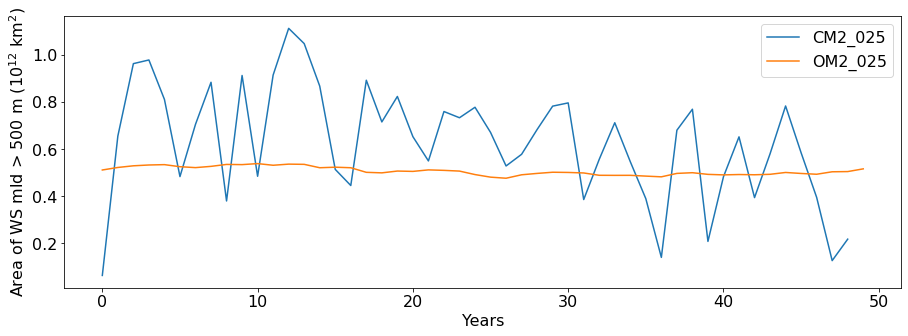

In [35]:
fig = plt.figure(figsize=(15,5))

plt.plot(area_CM2*1e-12, color='C0', label='CM2_025')
plt.plot(area_OM2*1e-12, color='C1', label='OM2_025')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Area of WS mld > 500 m (10$^{12}$ km$^{2}$)')

WS open ocean convection OM2:
- occurs every year at the same location/same extent

WS open ocean convectionCM2:
- location and size varies interannually